### Lohe Model Simulation: 3D Trajectory Example

In [1]:
# Import basic libraries
import os, sys
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import random

### Add project root to Python path

In [2]:
# Add project root to sys.path for module imports
current_dir = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)


### Import core simulation functions

In [3]:
# Import Lohe model simulator and plotting utilities
from Lohe import run_simulation, random_points_on_s2
from utils.plot_utils import plot_tail_with_highlighted_ends

### Simulation settings

In [4]:
# Define simulation parameters
N = 20          # Number of agents
K = 1.0         # Coupling strength
T = 100.0       # Total time
steps = 10000   # Number of steps
mu, sigma = 0.5, 0.288  # Frequency distribution
alpha, seed = 0.6, 5    # Initial directionality and seed

### Run simulation

In [5]:
# Sample natural frequencies from a normal distribution
omega_array = random.normal(random.key(0), (N,)) * sigma + mu

# Generate initial positions on the unit sphere
x0 = random_points_on_s2(N, alpha=alpha, seed=seed)

# Run the Lohe model simulation
position = run_simulation(N, K, omega_array, x0, t1=T, steps=steps)

# Time vector
t_eval = jnp.linspace(0.0, T, steps)

### Visualize trajectories on the sphere

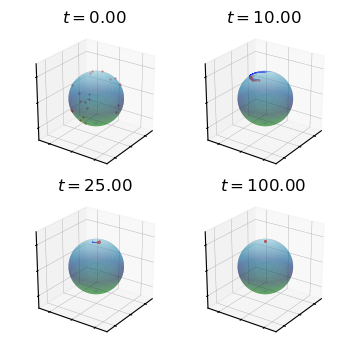

In [6]:
# Select snapshot times to visualize
time_list = [0, 10, 25, 100]

# Create a 2x2 grid of 3D subplots
fig, ax = plt.subplots(2, 2, figsize=(4, 4), subplot_kw={"projection": "3d"})
ax = ax.reshape(-1)

# Plot the recent tail of each agent’s trajectory at different times
for idx, center_time in enumerate(time_list):
    plot_tail_with_highlighted_ends(
        position, t_eval,
        center_time=center_time,
        ax=ax[idx],
        tail_length=300
    )
    ax[idx].set_title(f"$t={center_time:.2f}$")

plt.show()